<a href="https://colab.research.google.com/github/JCamacho2525/MAT-421-Material/blob/main/MAT_421_Project_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving MAT_421_project_data.xlsx to MAT_421_project_data (1).xlsx
1.288255622


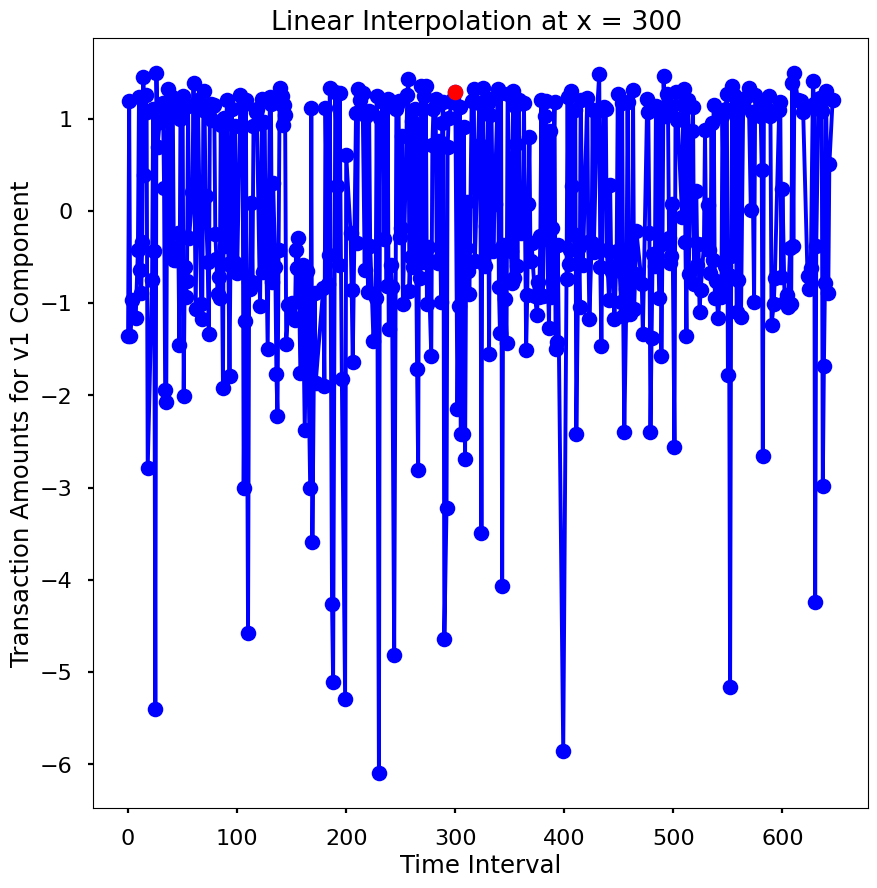

In [ ]:
#Importing data 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 


from pandas import *
from scipy.interpolate import interp1d
from pandas.core.dtypes.cast import NumpyArrayT
from scipy.interpolate import CubicSpline
from google.colab import files
uploaded = files.upload()
data = pd.read_excel('MAT_421_project_data.xlsx')

#defining Variables and interpolated function
x = np.array(data['Time'])
y = np.array(data['V1'])
f = interp1d(x,y)
y_linearInterp = f(300)
print(y_linearInterp)

#Plotting interpolation
plt.figure(figsize=(10,10))
plt.plot(x, y, '-ob', 300, y_linearInterp, 'ro')
plt.title("Linear Interpolation at x = 300 ")
plt.xlabel("Time Interval")
plt.ylabel("Transaction Amounts for v1 Component")
plt.show()


Saving MAT_421_project_data.xlsx to MAT_421_project_data (9).xlsx


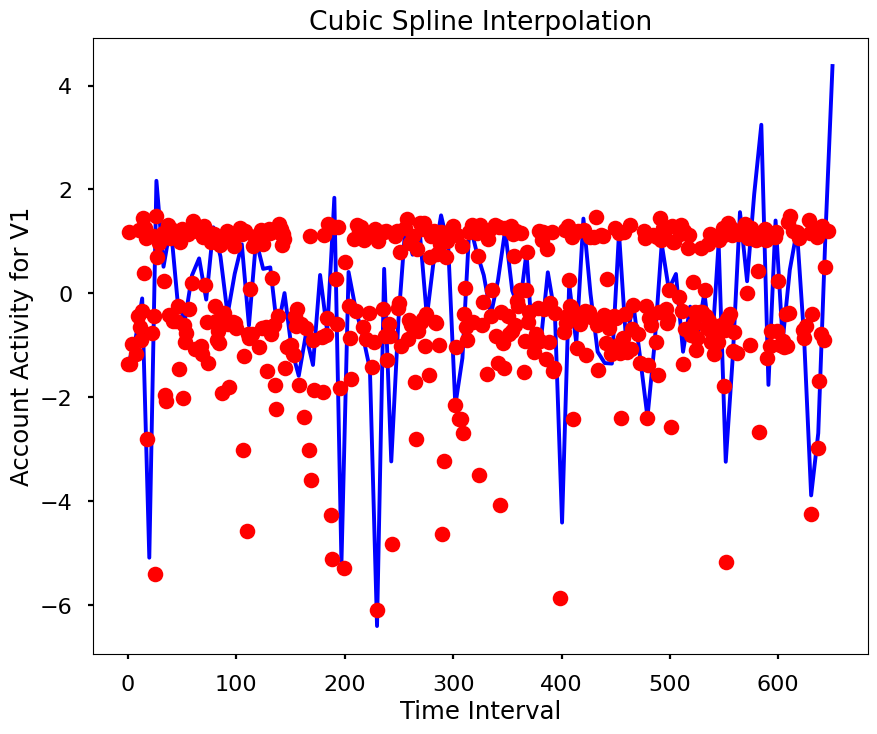

In [ ]:
#Importing data 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 


from pandas import *
from scipy.interpolate import interp1d
from pandas.core.dtypes.cast import NumpyArrayT
from scipy.interpolate import CubicSpline
from google.colab import files
uploaded = files.upload()
data = pd.read_excel('MAT_421_project_data.xlsx')


x = np.array(data['Time'])
y = np.array(data['V1'])
f = CubicSpline(x,y, bc_type = 'natural')
x_new = np.linspace(0, 650,100)
y_new = f(x_new)

plt.figure(figsize = (10, 8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Time Interval')
plt.ylabel('Account Activity for V1')
plt.show()

Saving MAT_421_project_data.xlsx to MAT_421_project_data (2).xlsx


/usr/local/lib/python3.9/dist-packages/numpy/lib/polynomial.py:779: RuntimeWarning: overflow encountered in multiply
  y = y * x + pv


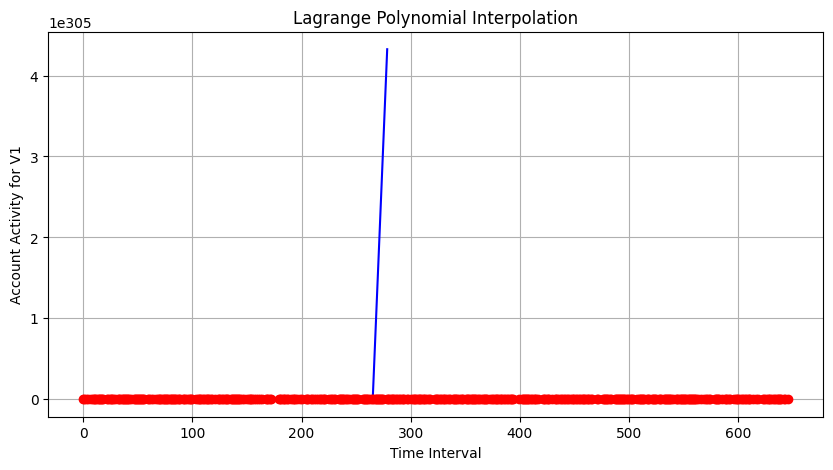

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd 


from pandas import *
from scipy.interpolate import interp1d
from pandas.core.dtypes.cast import NumpyArrayT
from google.colab import files
uploaded = files.upload()
data = pd.read_excel('MAT_421_project_data.xlsx')

x = np.array(data['Time'])
y = np.array(data['V1'])
x_new = np.linspace(0,650)
f = lagrange(x, y)


fig = plt.figure(figsize = (10,5))
plt.plot(x_new, f(x_new), 'b')
plt.plot( x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('Time Interval')
plt.ylabel('Account Activity for V1')
plt.show()

<ipython-input-1-725bd47b7d9c>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Saving MAT_421_project_data.xlsx to MAT_421_project_data.xlsx


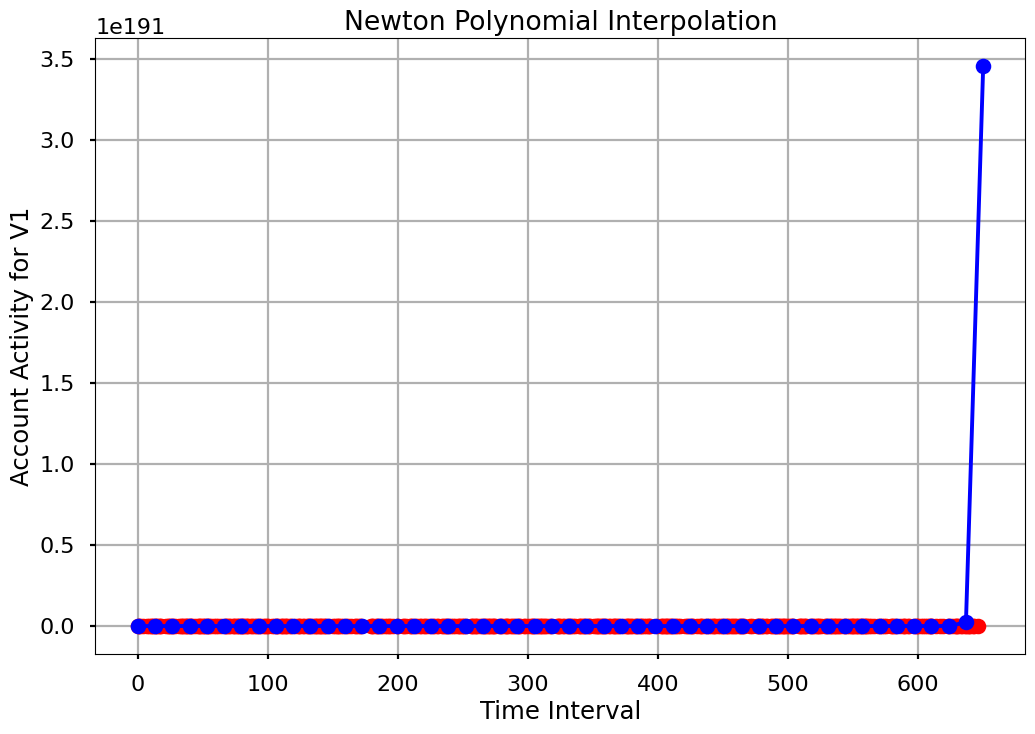

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd 


from pandas import *
from scipy.interpolate import interp1d
from pandas.core.dtypes.cast import NumpyArrayT
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
uploaded = files.upload()
data = pd.read_excel('MAT_421_project_data.xlsx')

def divided_diff(x, y):

  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y

  for j in range (1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef [i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):

  n = len(x_data) - 1
  p = coef[n]
  for k in range (1, n+1):
    p = coef[n-k] + (x - x_data[n-k]) * p
  return p

x = np.array(data['Time'])
y = np.array(data['V1'])

a_s = divided_diff(x, y) [0, :]
x_new = np.linspace(0,650)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12,8))
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new, '-bo')
plt.title('Newton Polynomial Interpolation')
plt.grid()
plt.xlabel('Time Interval')
plt.ylabel('Account Activity for V1')
plt.show()
     

In [3]:
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd 


from pandas import *
from scipy.interpolate import interp1d
from pandas.core.dtypes.cast import NumpyArrayT
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
uploaded = files.upload()
data = pd.read_excel('MAT_421_project_data.xlsx')
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(data['Time']).reshape((-1, 1))
y = np.array(data['V1'])

model = LinearRegression()


model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
print('slope:', new_model.coef_)

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

y_pred = model.intercept_ + model.coef_ * x
print('predicted response:', y_pred, sep='\n')

x_new = np.arange(5).reshape((-1, 1))
print(x_new)
y_new = model.predict(x_new)
print(y_new)

<ipython-input-3-14cb3d579ea7>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


Saving MAT_421_project_data.xlsx to MAT_421_project_data (2).xlsx
coefficient of determination: 0.0024074513880626425
intercept: -0.2992273541642518
slope: [0.00036085]
intercept: [-0.29922735]
slope: [[0.00036085]]
predicted response:
[-0.29922735 -0.29886651 -0.29850566 -0.29778396 -0.29670142 -0.29597972
 -0.29561887 -0.29525803 -0.29489718 -0.29453633 -0.29417548 -0.29381463
 -0.29345379 -0.29309294 -0.29273209 -0.2912887  -0.29092785 -0.290567
 -0.29020615 -0.2898453  -0.28948446 -0.28876276 -0.28768022 -0.28731937
 -0.28695852 -0.28659767 -0.28623682 -0.28587598 -0.28551513 -0.28515428
 -0.28479343 -0.28443258 -0.28407174 -0.28335004 -0.28262834 -0.2822675
 -0.28190665 -0.2815458  -0.28118495 -0.2808241  -0.28046326 -0.28010241
 -0.27974156 -0.27938071 -0.27901986 -0.27793732 -0.27757647 -0.27685477
 -0.27613308 -0.27505053 -0.27468969 -0.27432884 -0.27396799 -0.27360714
 -0.27288545 -0.2725246  -0.27216375 -0.2718029  -0.27144205 -0.27108121
 -0.27072036 -0.27035951 -0.26999866 